# Marketing Data Analysis 
par Mohamed LAAJAJ


## Introduction

**Objectif :**  
L'entreprise "A" a effectué plusieures campagnes marketing et souhaite mieux comprendre les résultats.

**Section 1: Exploration des données**  
* Import de nos données
* Vérification du format & type de données 
* Création/modification de colonnes si besoin
* Analyse univariée de nos données (moyenne, médiane, mode, quartile)
* Pré-traitement : présence de valeurs extrêmes ou incorrectes ? 

**Section 2: Analyse statistique bivariée**  
Nous allons dans cette partie effectuer plusieurs tests statistiques (ANOVA, Chi², T-Test) afin de comprendre les relations entre nos variables.
Example de questions : 
* Relation entre la réponse à la campagne et les données quantitatives avec un test ANOVA 
* Relation entre la réponse à la campagne et les données quantitatives avec un test de Chi²
* Relation entre nos variables quantitatives à l'aide d'un test de correlation

**Section 3: Création d'un modèle simple de Machine Learning**  
Après avoir analysé les relationns entre nos variables, nous pouvons construire un modèle simple de Machine Learning permettant de prédire les réponses à la campagne marketing, et donc de mieux cibler les prochaines campagnes.

* Choix des variables et des modèles
* Création d'une fonction permettant d'évaluer plusieurs modèles
* Résultats


## Section 1 - Exploration des données


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max.columns', 100)

In [2]:
#Import de nos données
data = pd.read_excel('Excel/marketing_campaign.xlsx')

In [3]:
# Jetons un coup d'oeil à nos données
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
# Vérifions nos types de données 
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Pour rappel , l'objectif est de savoir si une personne a répondu ou non à la campagne marketing.  Dans le cadre de notre objectif, le nombre de réponses importe peu.  
Nous allons créer une colonne qui indiquera si une personne a une répondu à une campagne ou non.

Commeçons par créer une liste contenant les colonnes commençant par 'Accepted'

In [85]:
accepted = [n for n in data.columns if 'Accepted' in n] 
accepted

['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'isAccepted']

In [6]:
# Puis, faisons la somme de ces colonnes pour savoir si une personne a acceptée zéro, une ou plusieurs campagnes.
data['isAccepted'] = data[accepted].sum(axis=1)
data['isAccepted'] 

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Name: isAccepted, Length: 2240, dtype: int64

In [7]:
# Maintenant créons une nouvelle colonne indiquant si une personne a acceptée ou non.
# Si la valeur de la colonne est supérieure à 0 : cette personne a acceptée, sinon elle n'a pas acceptée.

data['response'] = data['isAccepted'].apply(lambda x : "accepted" if x>0 else 'refused')

In [8]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'isAccepted', 'response'],
      dtype='object')

Nous avons une colonne 'Date de Naissance', il serait, je pense, plus pertinent d'avoir des informations sur l'âge du répondant.

In [9]:
# Création d'une colonne âge : difference entre la date de reponse et l'annee de naissance 

data['age'] = pd.to_datetime(data['Dt_Customer']).dt.year - data['Year_Birth'] 
data['age'] 

0       55
1       60
2       48
3       30
4       33
        ..
2235    46
2236    68
2237    33
2238    58
2239    58
Name: age, Length: 2240, dtype: int64

In [10]:
data.Z_CostContact.unique()

array([3])

In [11]:
data.Z_Revenue.unique()

array([11])

Les colonnes Z_Revenu et Z_CostContact disposent d'une unique valeure. Nous allons les retirer de notre jeu de données.

In [12]:
# Nous allons ensuite ajouter à notre liste l'ensemble des colonnes que nous voulons retirer de notre jeux de données.
accepted.extend(['ID', "Dt_Customer", 'isAccepted','Response', 'Z_CostContact', 'Z_Revenue', 'Year_Birth'])
accepted

['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'ID',
 'Dt_Customer',
 'isAccepted',
 'Response',
 'Z_CostContact',
 'Z_Revenue',
 'Year_Birth']

In [13]:
df = data.drop(columns=accepted)

In [14]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,response,age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,refused,55
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,refused,60
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,refused,48
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,refused,30
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,refused,33


In [15]:
df.dtypes

Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
response                object
age                      int64
dtype: object

Super ! Maintenant, créons une fonction nous permettant d'effectuer une analyse univariée de nos données avec des informations comme:
* Moyenne  
* Ecart-Type  
* Quartile  
* Nb de valeurs manquantes      

Nous aurions pu utilisé la fonction *describe()* de panda mais l'objectif ici est de montrer nos compétences sous Python.

In [16]:
# Création d'une fonction qui afficher un DataFrame contenant une analyse univariée de nos données 

def univariate(df, col=None): 
    #La fonction prend en entrée un DataFrame et, optionnelement, une colonne nous permettant de filter notre résultat final.
    
    # Le résultat final est un dataframe contenant les colonnes suivantes.
    output = pd.DataFrame(columns = ['Type', 'Count', 'Valeurs Manquantes', 'Nb Valeurs uniques' ,'Mode', 'Moyenne', 'Min', 
    'Q1', 'Median', 'Q3', 'Max', 'Skewness', 'Kurtosis'])
    
    # Vérification si l'argument optionnel est utilisé ou non
    if col == None:
        cols= df.columns
    else:
        cols = [col]

    # La fonction va effectuer une boucle sur l'ensemble des colonnes. 
    for element in cols:

        # Ici, la fonction va d'abord filtrer sur les données de type quantitatives.
        # Nous ne pouvons en effet pas calculer de moyenne sur des données qualitatives. 
        if pd.api.types.is_numeric_dtype(df[element]) :
            type = df[element].dtype
            count = df[element].count()
            v_m = df[element].isnull().sum()
            v_u = df[element].nunique()
            mode = df[element].mode()[0]
            moyenne = round(df[element].mean(),2)
            min = df[element].min()
            q1 = df[element].quantile(0.25)
            median = df[element].median()
            q3 = df[element].quantile(0.75)
            max = df[element].max()
            skewness = round(df[element].skew(),3)
            kurtosis = round(df[element].kurtosis(),3)

            output.loc[element] = [type,count,v_m,v_u,mode,moyenne,min,q1,median,q3,max,skewness,kurtosis]

        else:
            type = df[element].dtype
            count = df[element].count()
            v_m = df[element].isnull().sum()
            v_u = df[element].nunique()
            mode = df[element].mode()[0]
            
            output.loc[element] = [type,count,v_m,v_u,mode,'-','-','-','-','-','-','-','-']

    return output.sort_values(by='Type')        



In [17]:
univariate(df)

,Type,Count,Valeurs Manquantes,Nb Valeurs uniques,Mode,Moyenne,Min,Q1,Median,Q3,Max,Skewness,Kurtosis
MntFishProducts,int64,2240,0,182,0,37.53,0,3.0,12.0,50.0,259,1.92,3.096
Complain,int64,2240,0,2,0,0.01,0,0.0,0.0,0.0,1,10.189,101.906
NumWebVisitsMonth,int64,2240,0,16,7,5.32,0,3.0,6.0,7.0,20,0.208,1.822
NumStorePurchases,int64,2240,0,14,3,5.79,0,3.0,5.0,8.0,13,0.702,-0.622
NumCatalogPurchases,int64,2240,0,14,0,2.66,0,0.0,2.0,4.0,28,1.881,8.047
NumWebPurchases,int64,2240,0,15,2,4.08,0,2.0,4.0,6.0,27,1.383,5.703
NumDealsPurchases,int64,2240,0,15,1,2.33,0,1.0,2.0,3.0,15,2.419,8.937
MntGoldProds,int64,2240,0,213,1,44.02,0,9.0,24.0,56.0,362,1.886,3.552
MntSweetProducts,int64,2240,0,177,0,27.06,0,1.0,8.0,33.0,263,2.136,4.377
age,int64,2240,0,61,41,44.22,16,36.0,43.0,54.0,121,0.351,0.737


Ce tableau nous fournit plusieurs informations intéressantes.
* Pas de données manquantes si ce n'est la colonne Income. Nous allons traiter ces données.
* Quelques valeurs extrêmes : colonne Income --> 666666.0
* Des valeurs d'année à vérifier (année minimale de 1893 à supprimer)
* Très peu de données qualitatives (uniquement 3 dont notre variable expliquée)

In [18]:
# Remplaçons les valeurs nulles de la colonne 'Income' par la médiane.
# Pourquoi par la médiane ? Parce que celle-ci est insensible aux valeurs extrêmes, l'utilisation de la moyenne viendrait 'amplifier' l'impact de ces valeurs
df['Income'] = df['Income'].fillna(df['Income'].median())

### Visualisation de notre jeu de données

##### I. Données quantitatives

Text(0.5, 1.0, 'Boxplot du Revenu')

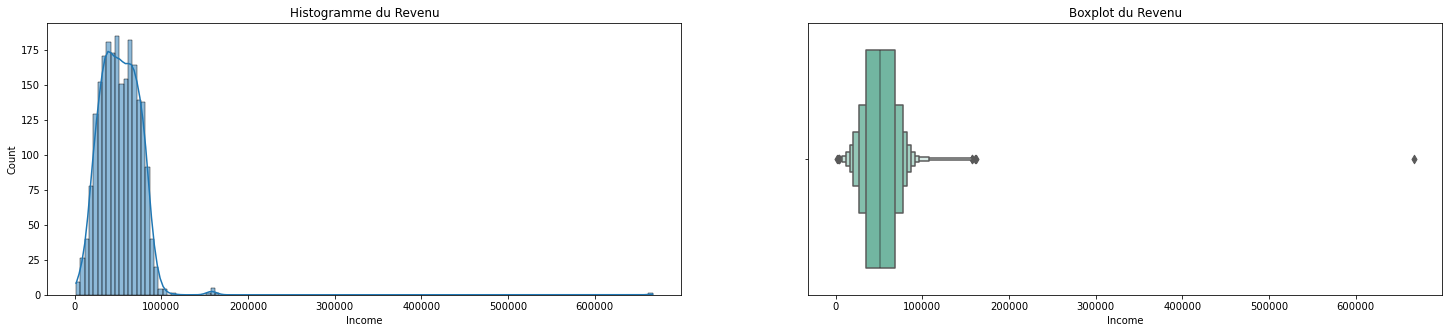

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(25,5));

sns.histplot(ax = axes[0],data = df, x= 'Income', kde=True, palette="Set2");
axes[0].set_title('Histogramme du Revenu')

sns.boxenplot(ax = axes[1],data = df, x='Income', palette="Set2");
axes[1].set_title('Boxplot du Revenu')

On remarque très rapidemment que nous avons une valeur extrême qui se situe a 666 666 (voir tableau du dessus). Jetons un coup d'oeil à cette valeur.

In [20]:
df[df['Income'] == df['Income'].max()]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,response,age
2233,Graduation,Together,666666.0,1,0,23,9,14,18,8,1,12,4,3,1,3,6,0,refused,36


Nous allons éliminer cette valeur de notre jeu de données.

In [21]:
df = df[df['Income'] != df['Income'].max()]

In [22]:
# Pour aller plus vite dans notre analyse, définissons une fonction comme suit:

def numeric_plot_univariate(df, col):
    fig, axes = plt.subplots(1, 2, figsize=(25,5));

    sns.histplot(ax = axes[0],data = df, x= col, kde=True);
    axes[0].set_title(f'Histogramme du {col}')

    sns.boxenplot(ax = axes[1],data = df, x=col);
    axes[1].set_title(f'Boxplot de {col}')

    # A l'aide de notre fonction définit plus haut, nous allons afficher des informations sur nos données
    data = univariate(df,col)
    text = f'------------- {col} -------------\n'
    for col in data.columns:
        text += f"{col} : {data[col][0]}\n"
    
    plt.text(0.91,0.2,text, fontsize=13, transform=plt.gcf().transFigure)


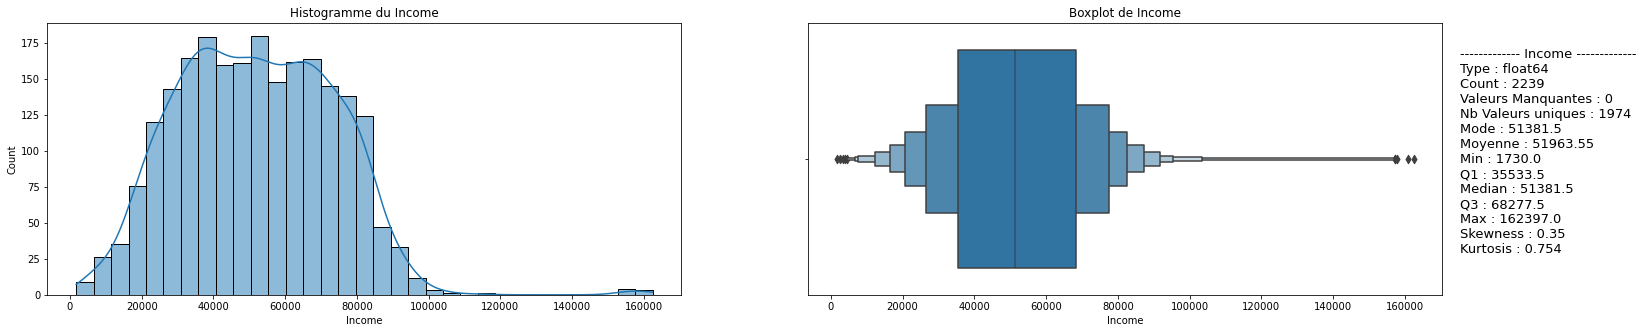

In [23]:
numeric_plot_univariate(df, "Income")

C'est beaucoup mieux ! Regardons via notre fonction univariate définit précèdemment les informations sur notre colonne.

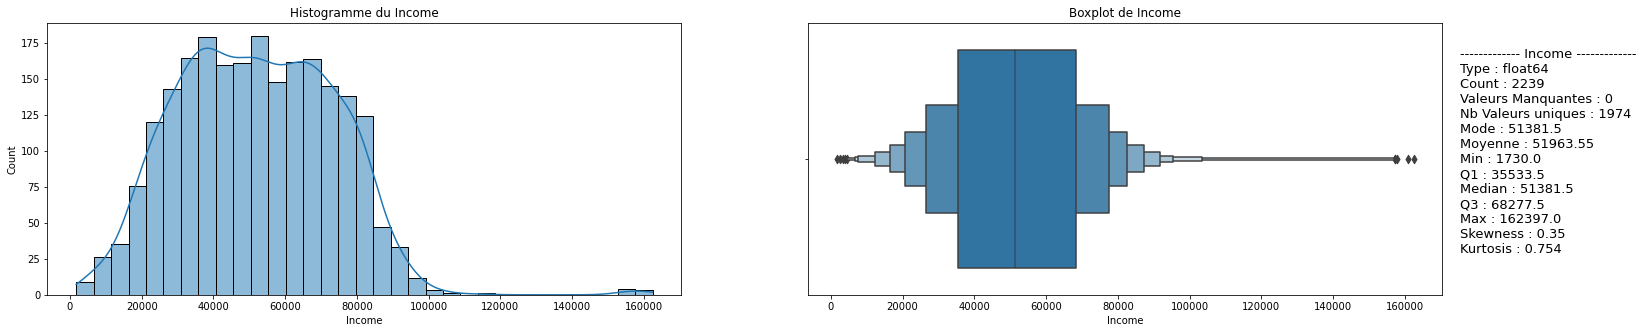

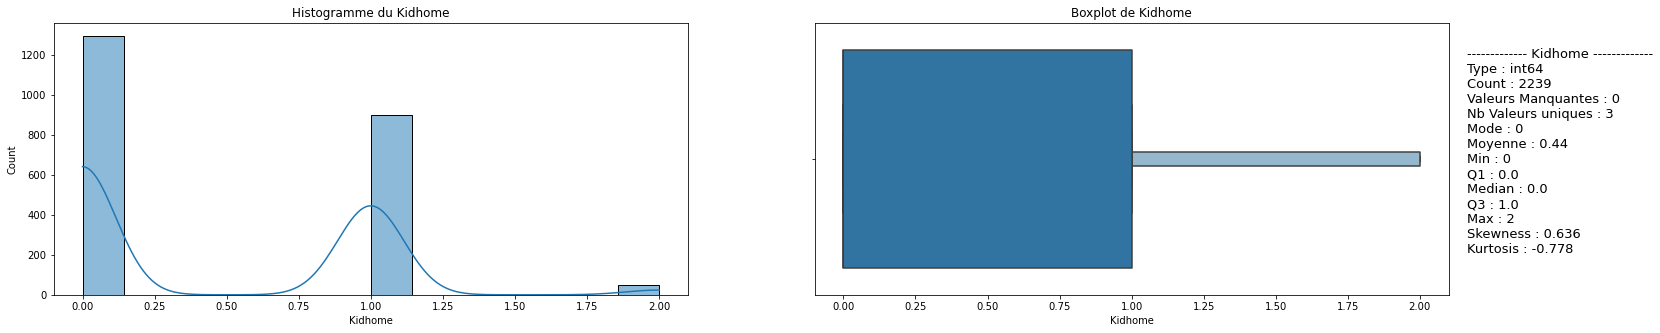

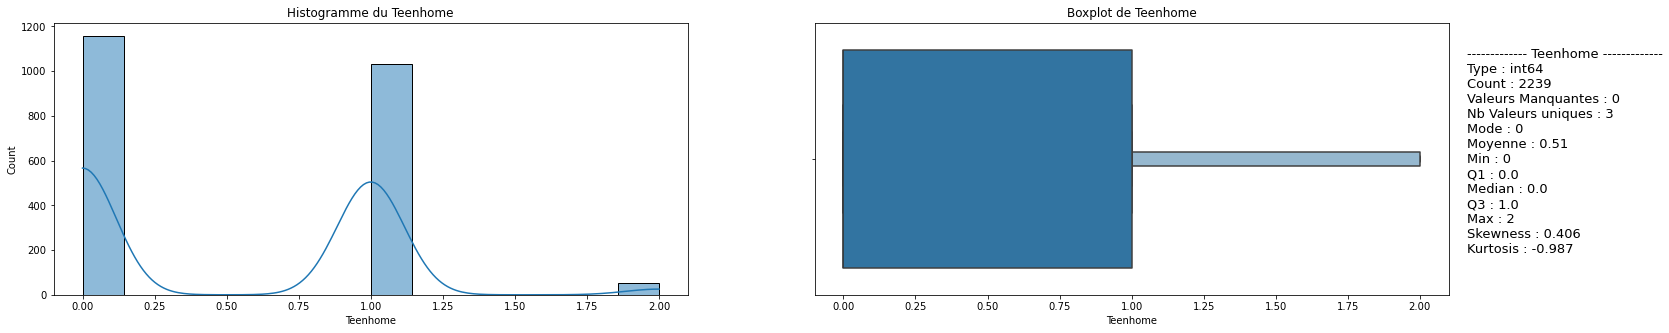

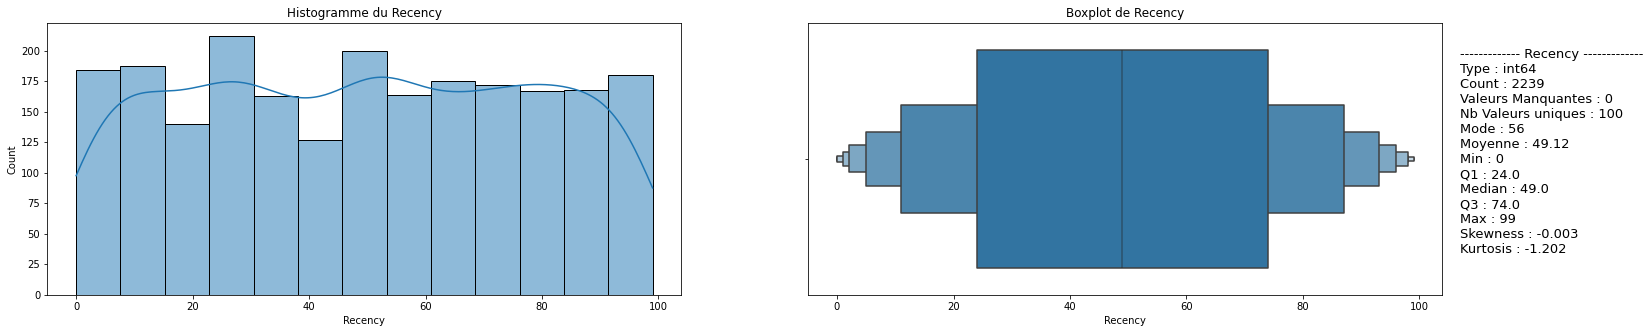

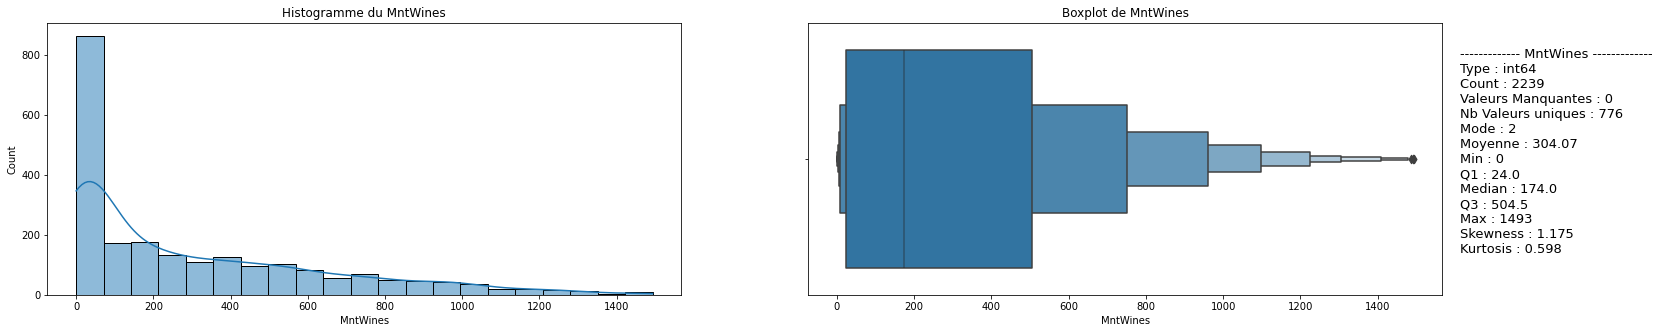

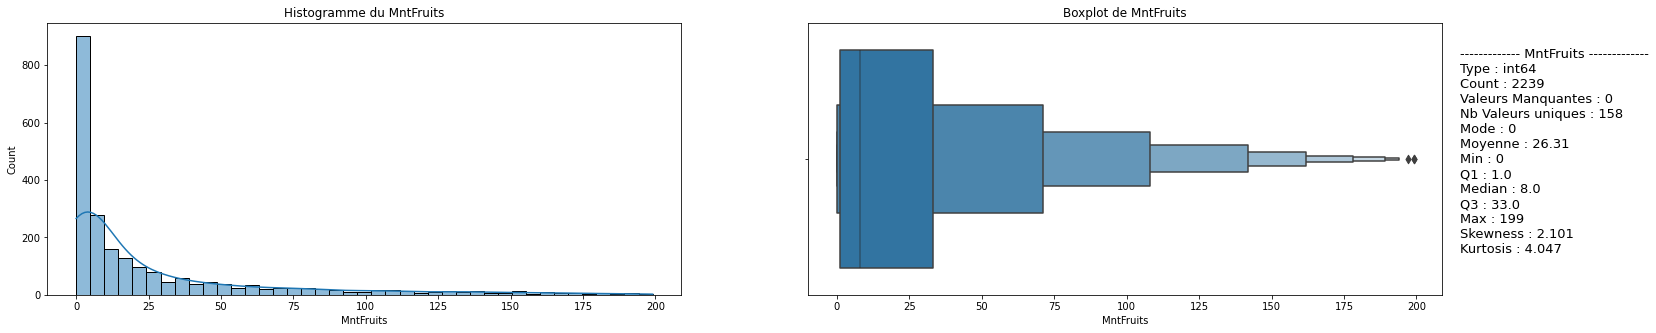

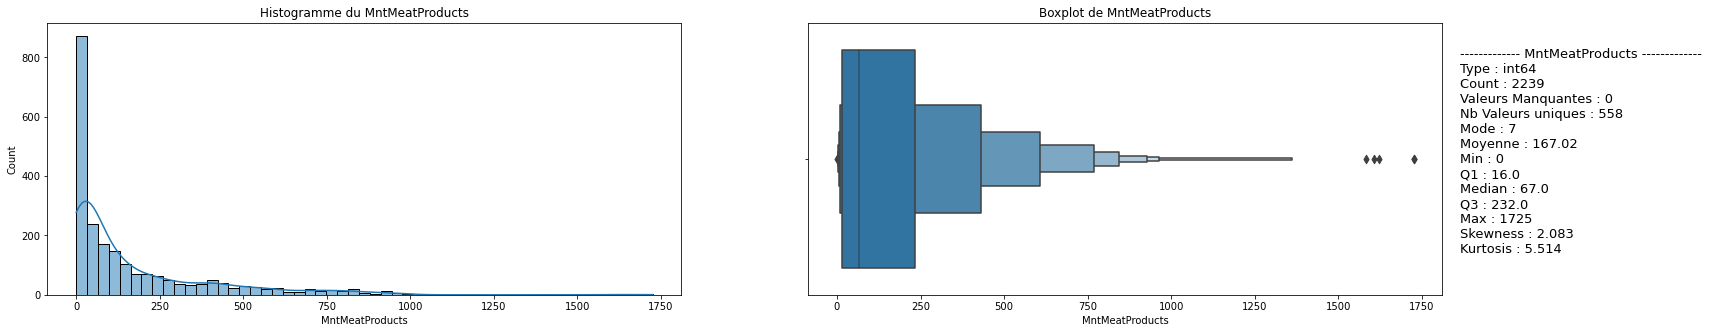

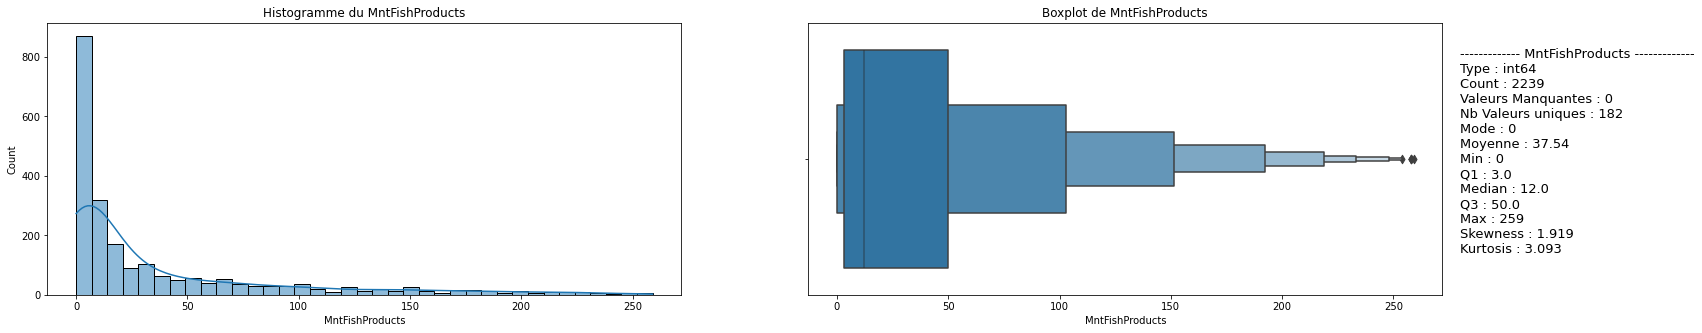

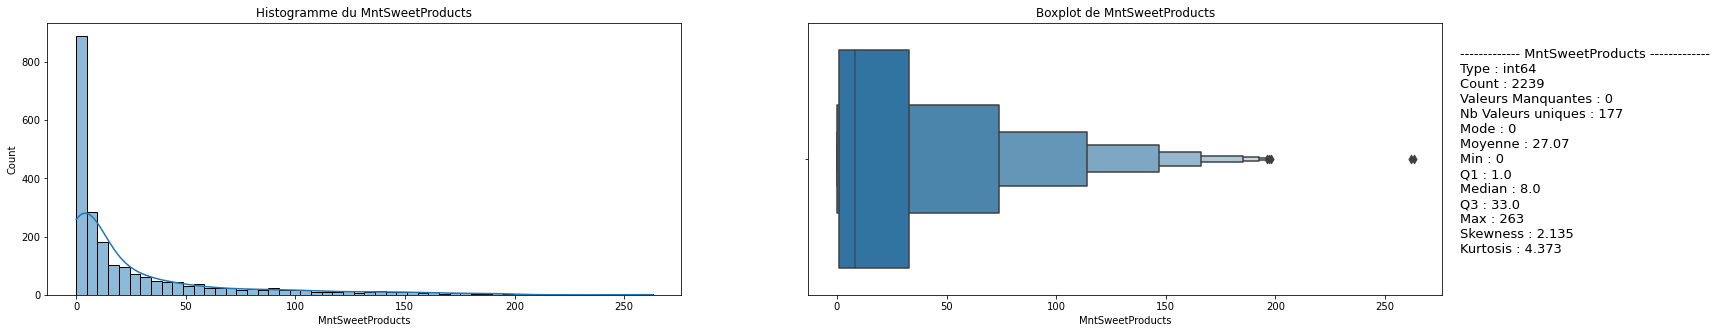

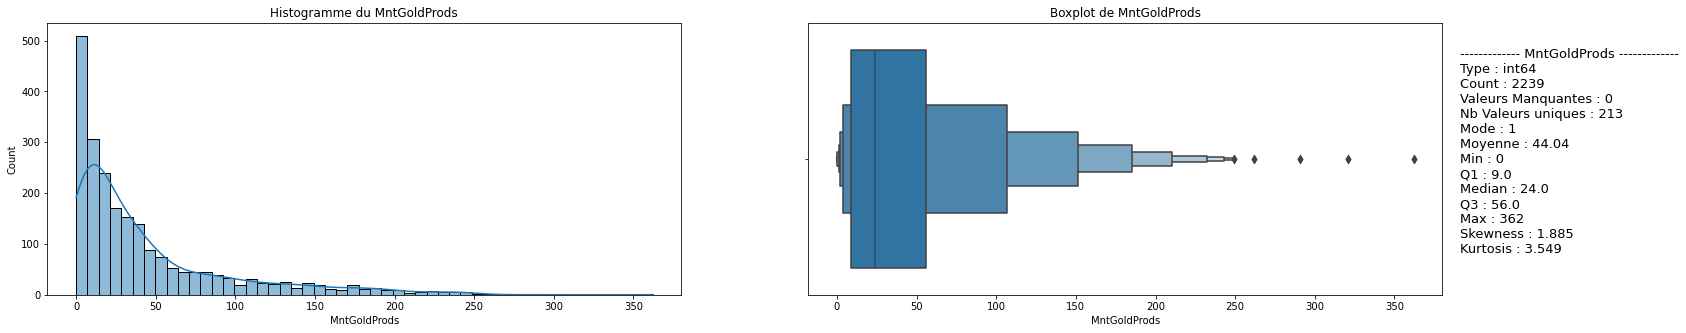

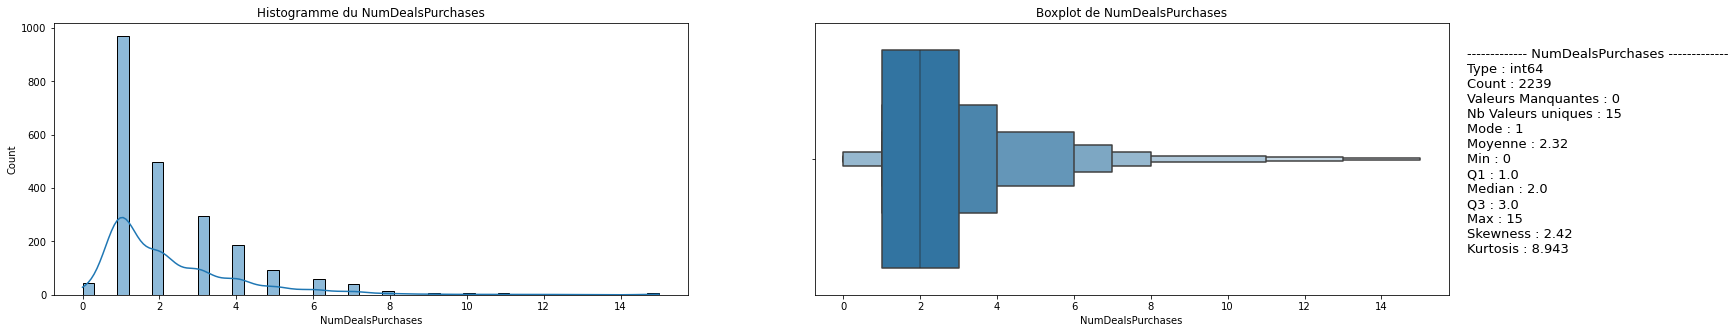

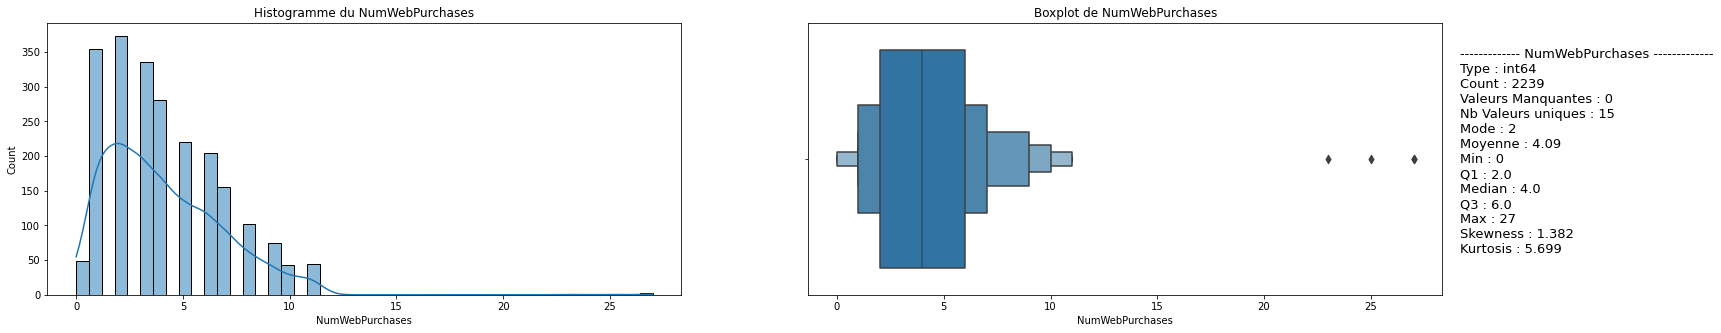

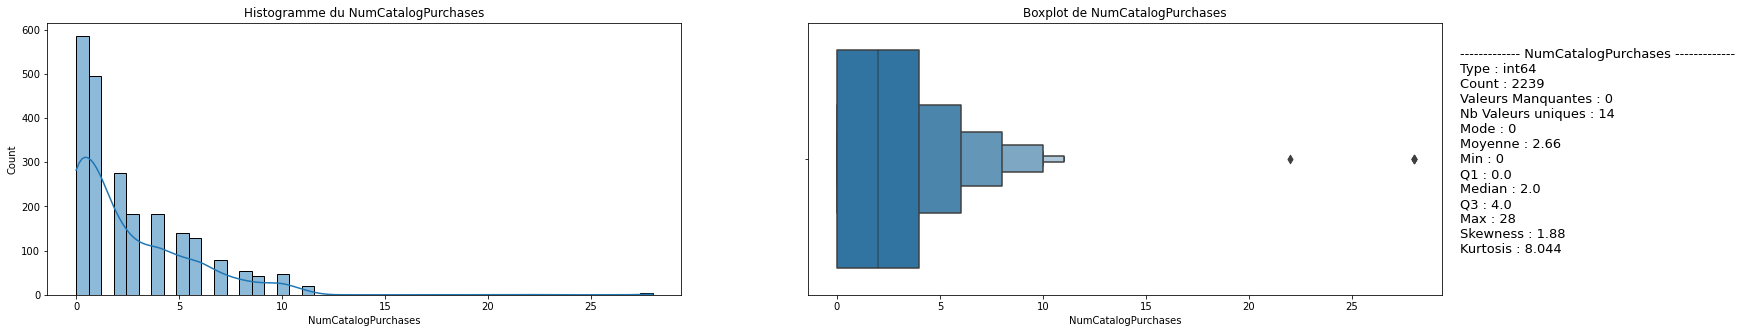

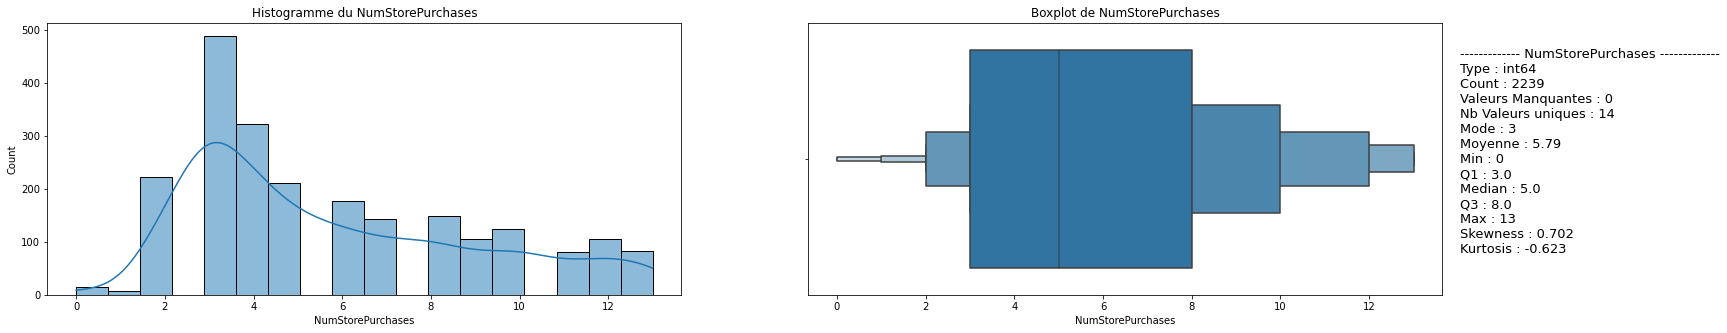

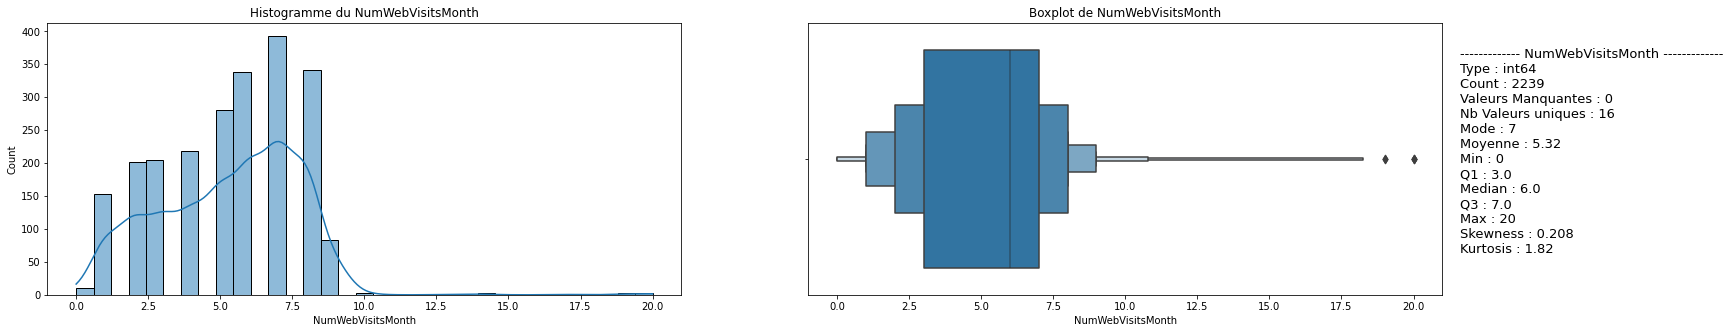

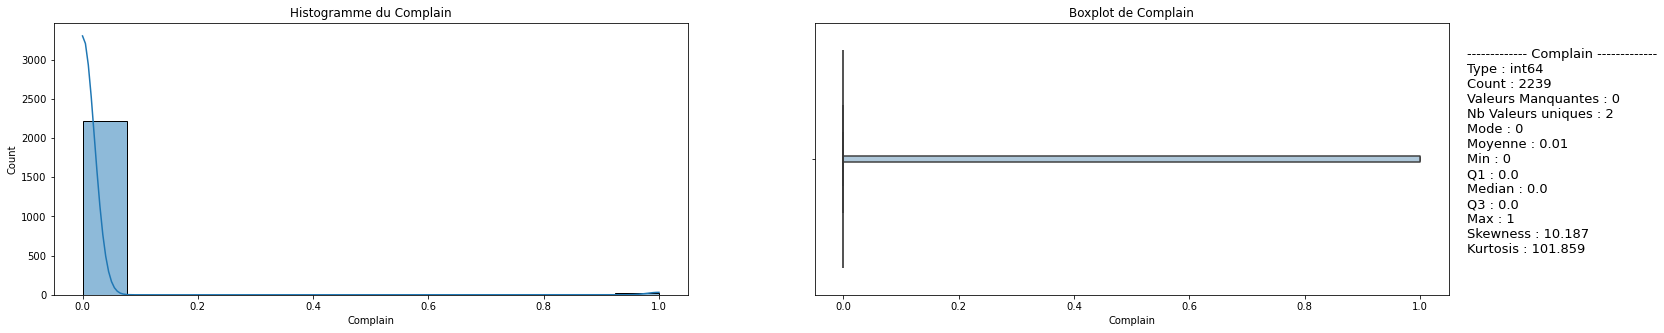

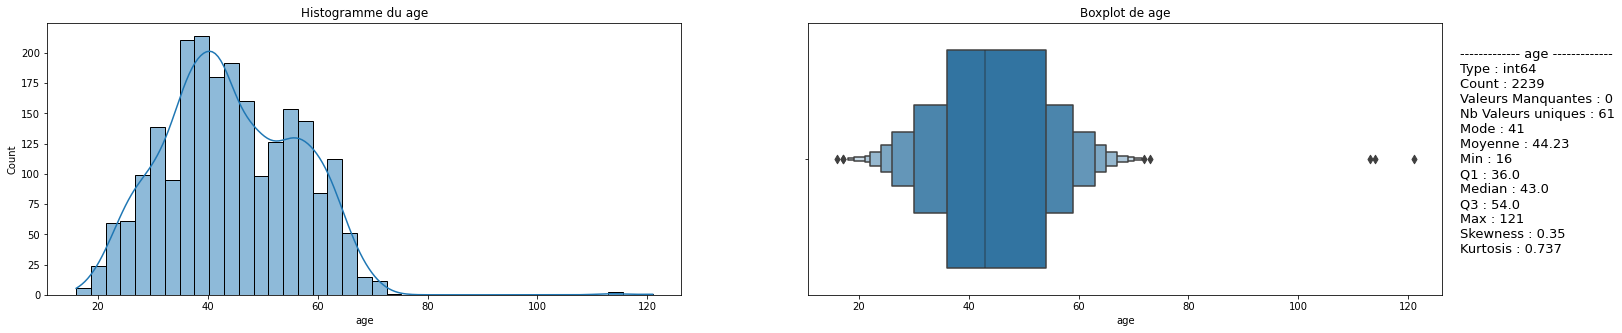

In [24]:
#Boucle pour faire le tour de l'ensemble de nos colonnes numériques
num_col = [col for col in df.select_dtypes(np.number).columns]

for col in num_col:
    numeric_plot_univariate(df,col)

In [25]:
# Suppression des données avec un âge inférieur à 100 ans:

df = df[df['age']<100]

In [26]:
# Définition d'une fonction supprimant automatiquement les données extrêmes. Nous n'allons pour l'instant pas l'utiliser. 
# A voir dans la suite pour potentiellement améliorer notre modèle.

def removing_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    data = df[(df[col]> Q1-(1.5*IQR)) & (df[col]< Q3+(1.5*IQR))]
    return numeric_plot_univariate(data, col)

##### II. Données qualitatives

In [27]:
cat_col = [n for n in df.select_dtypes('object').columns]
cat_col

['Education', 'Marital_Status', 'response']

In [28]:
def value_count_perc(df, col):
    v_c = df[col].value_counts()
    v_c_p = df[col].value_counts(normalize=True).apply(lambda x : round(x*100,2))

    output = pd.concat([v_c, v_c_p], keys=['Count', '%'], axis=1)

    return output


In [29]:
value_count_perc(df, cat_col[0])

,Count,%
Graduation,1126,50.36
PhD,485,21.69
Master,370,16.55
2n Cycle,201,8.99
Basic,54,2.42


In [30]:
value_count_perc(df, cat_col[1])

,Count,%
Married,864,38.64
Together,578,25.85
Single,479,21.42
Divorced,231,10.33
Widow,77,3.44
Alone,3,0.13
Absurd,2,0.09
YOLO,2,0.09


In [31]:
value_count_perc(df, cat_col[2])

,Count,%
refused,1774,79.34
accepted,462,20.66


Nous allons nettoyer les données en supprimant les entrées 'YOLO' et 'Absurd' et en remplaçant 'Alone' par 'Single'.

In [32]:
df = df[(df['Marital_Status']!='YOLO') & (df['Marital_Status']!='Absurd')]

In [33]:
df['Marital_Status'] = df['Marital_Status'].mask(df['Marital_Status'] == 'Alone', 'Single')

In [34]:
value_count_perc(df, "Marital_Status")

,Count,%
Married,864,38.71
Together,578,25.90
Single,482,21.59
Divorced,231,10.35
Widow,77,3.45


## Section 2 - Analyse bivariée

### Relation entre nos variables explicatives et notre variable expliquée


#### Données qualitative vs quantitative

In [35]:
def anova(num_col, cat_col="response"):
    unique_values = df[cat_col].unique()
    groups = []

    for element in unique_values:
        groups.append(df[df[cat_col] == element][num_col])

    T, p = stats.f_oneway(*groups)
    return T,p

In [36]:
def graph(num_col):
    
    fig, axes = plt.subplots(1, 2, figsize=(25,5));

    sns.histplot(ax = axes[0], data = df, x='Income', hue='response',multiple="stack", palette="Set2",
    edgecolor=".3",
    linewidth=.5)

    sns.violinplot(ax = axes[1], data = df, x='response', y=num_col , palette="Set2")

    sns.despine(offset=10, trim=True);

    # A l'aide de notre fonction définit plus haut, nous allons afficher des informations sur nos données
    T, p  = anova(num_col)
    text = f'------------- Résultats ANOVA -------------\n'
    text += f'{num_col} vs Response\n'
    text += f"Score : {round(T,3)}\np_value : {round(p,3)}\n"
    if p<0.05:
        text += 'Test significatif'
    else:
        text += 'Test non significatif'

    plt.text(0.91,0.4,text, fontsize=14, transform=plt.gcf().transFigure)

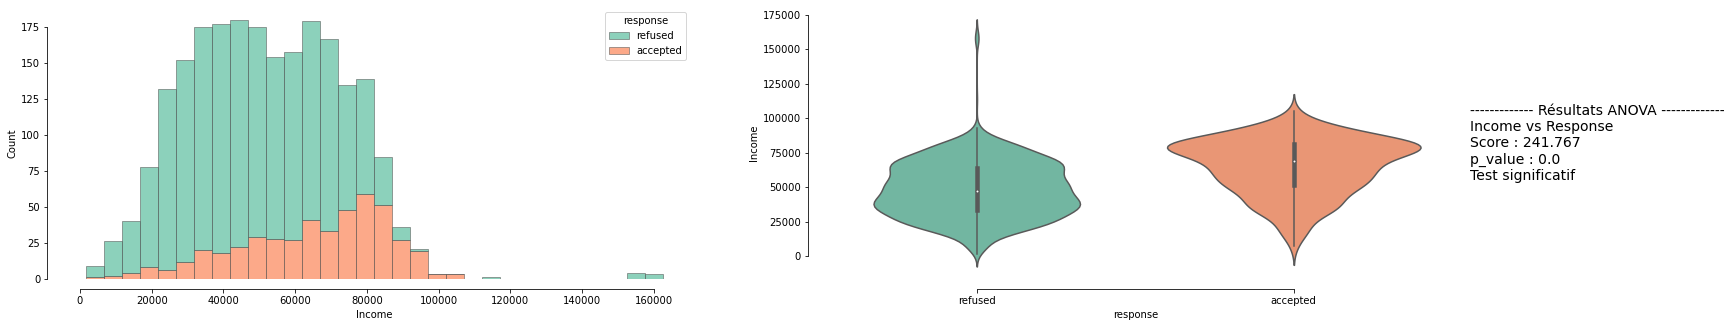

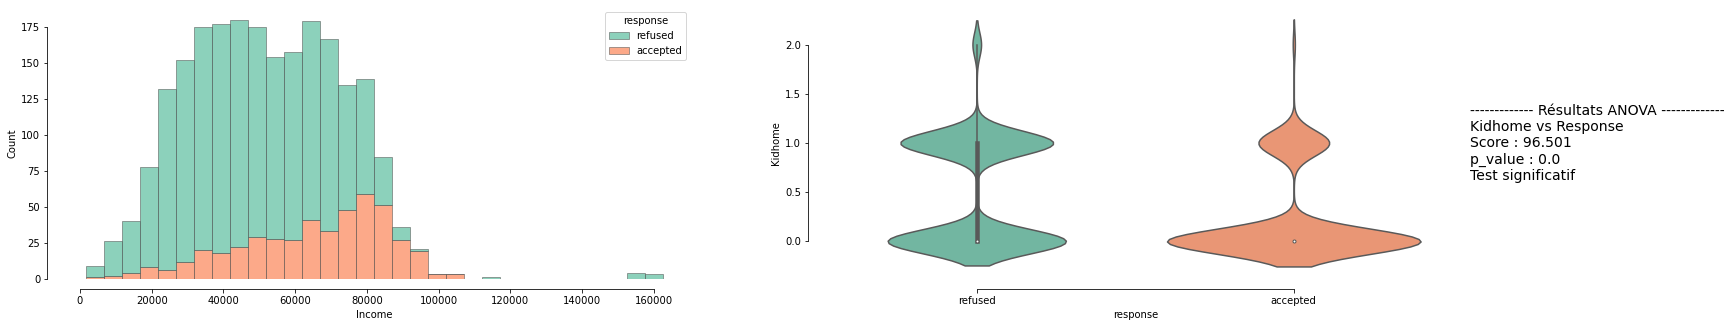

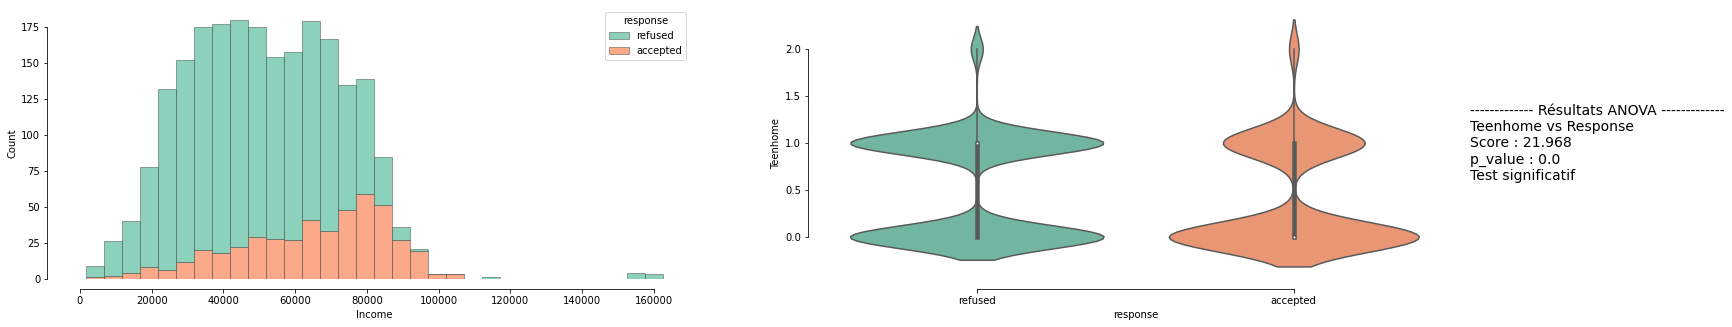

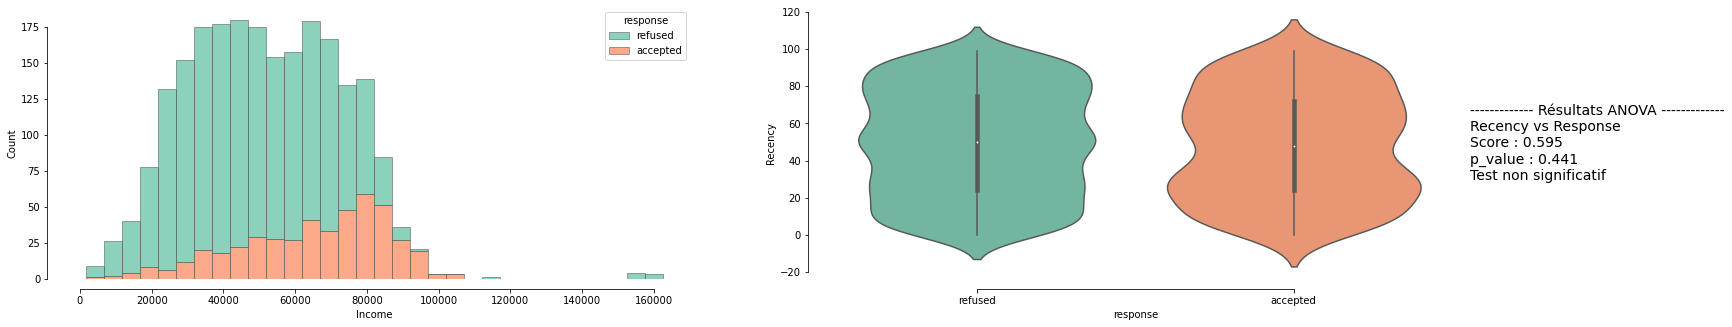

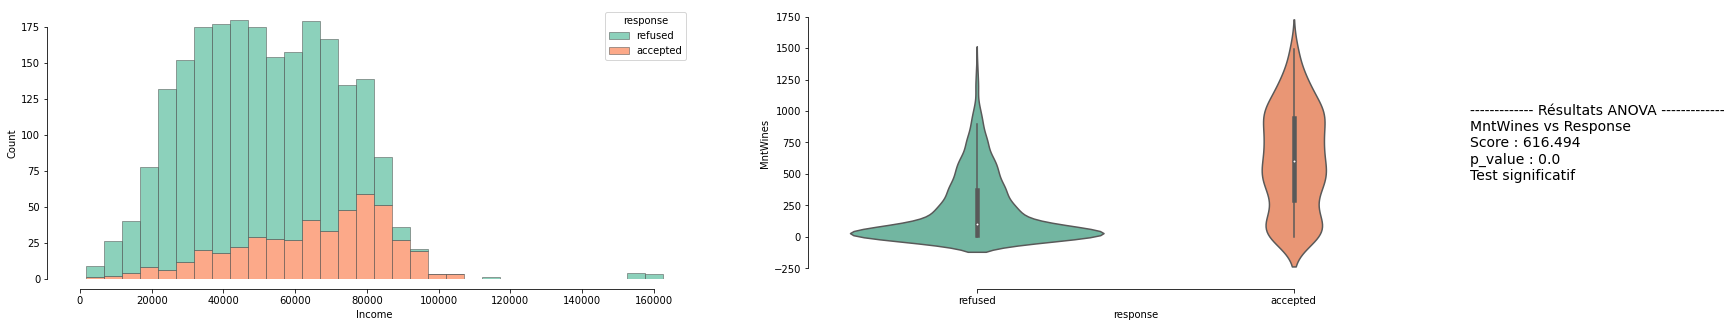

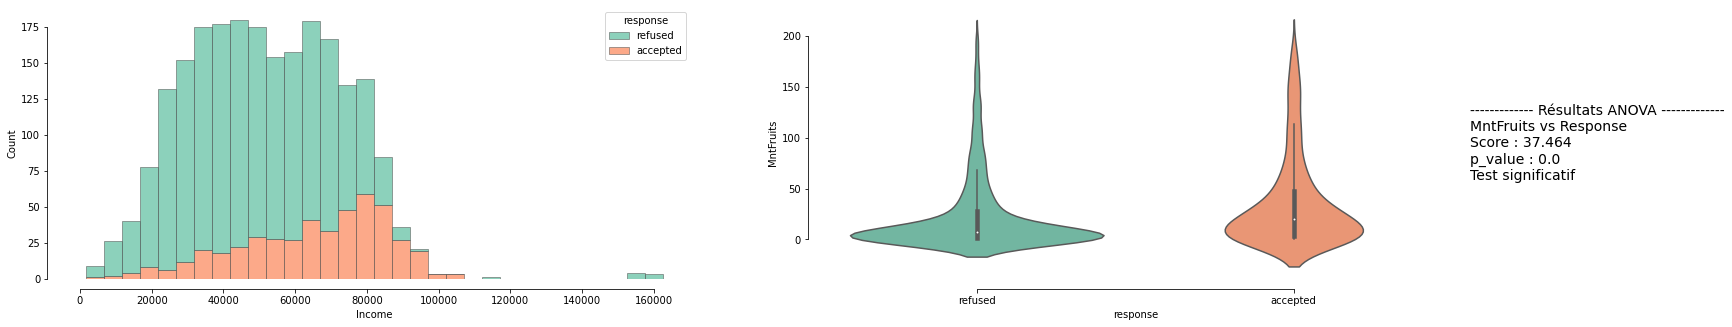

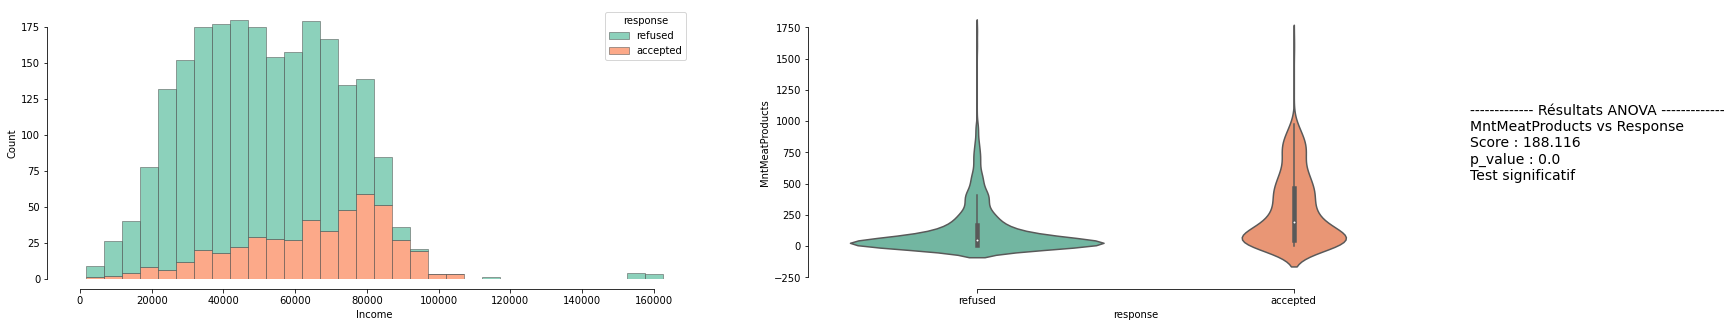

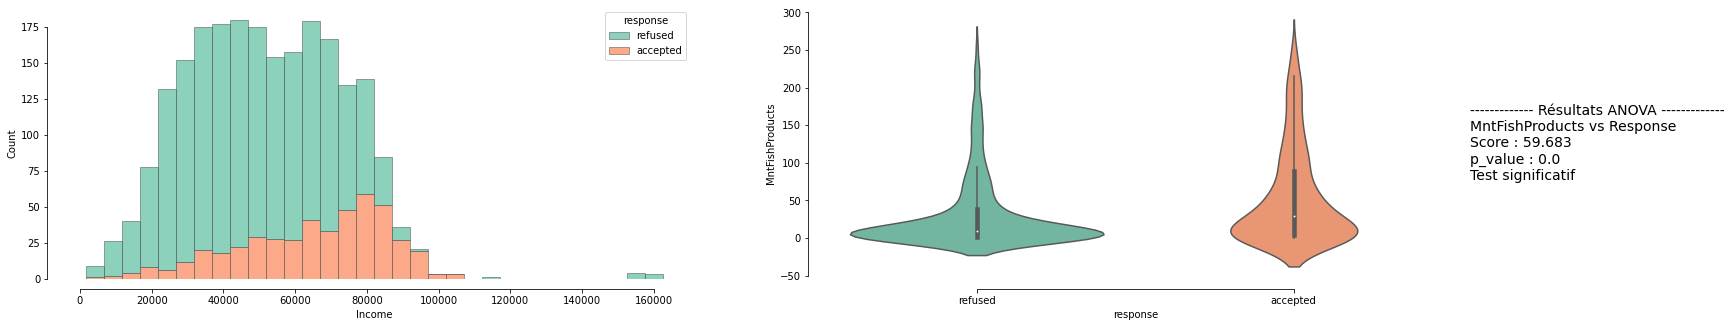

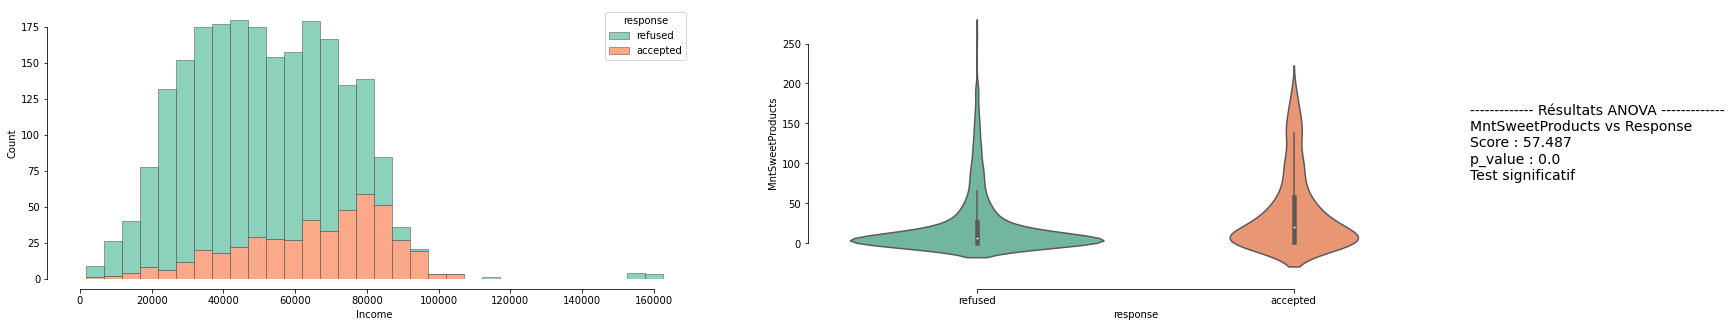

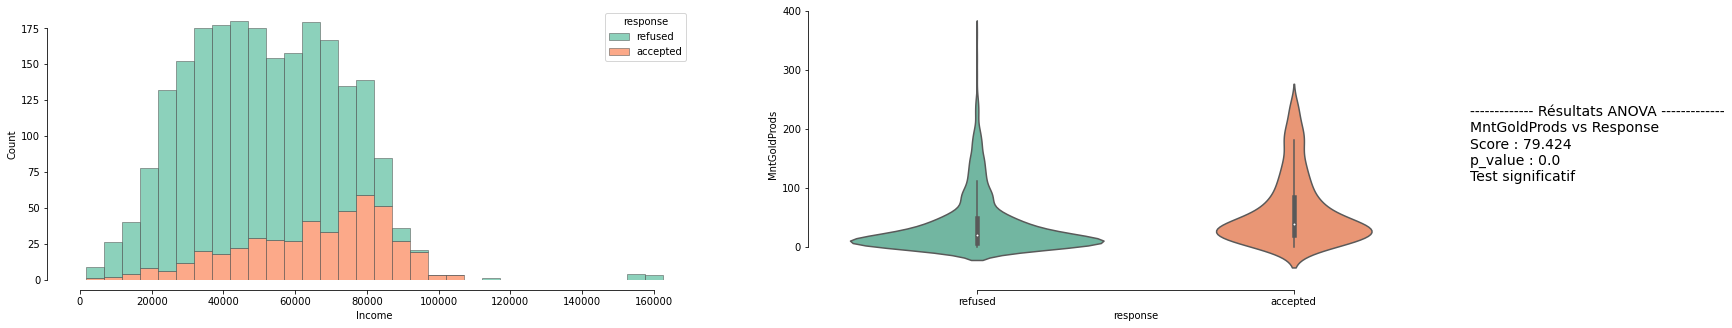

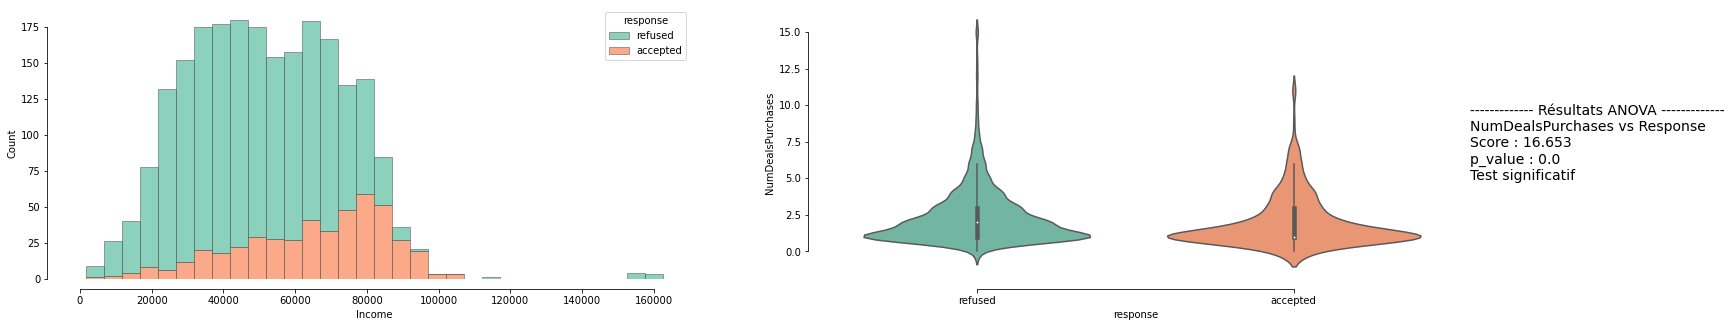

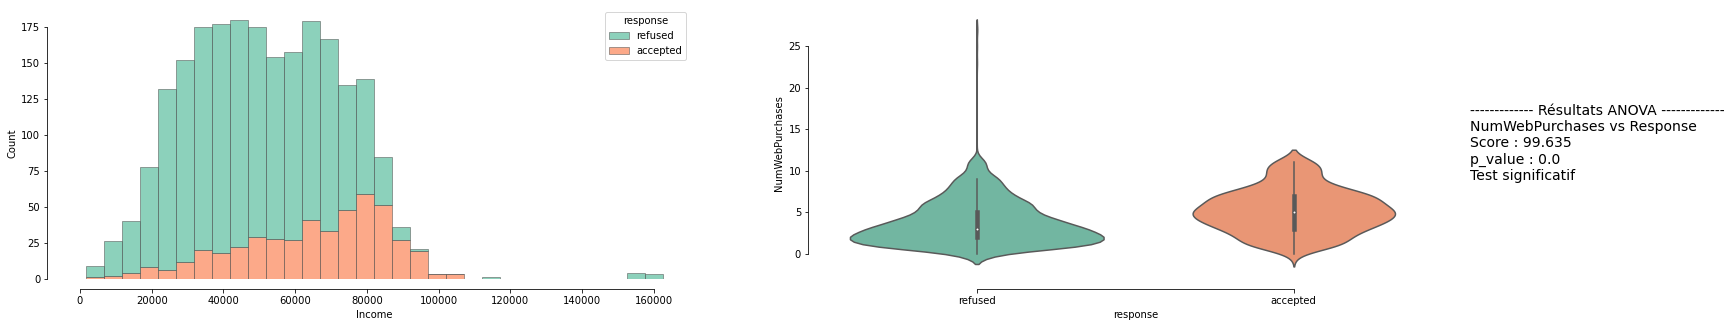

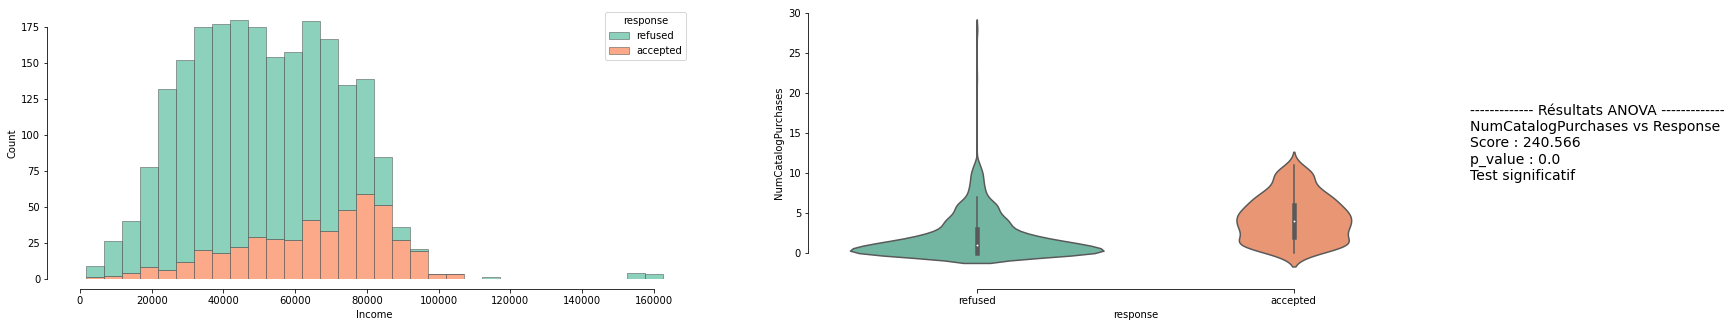

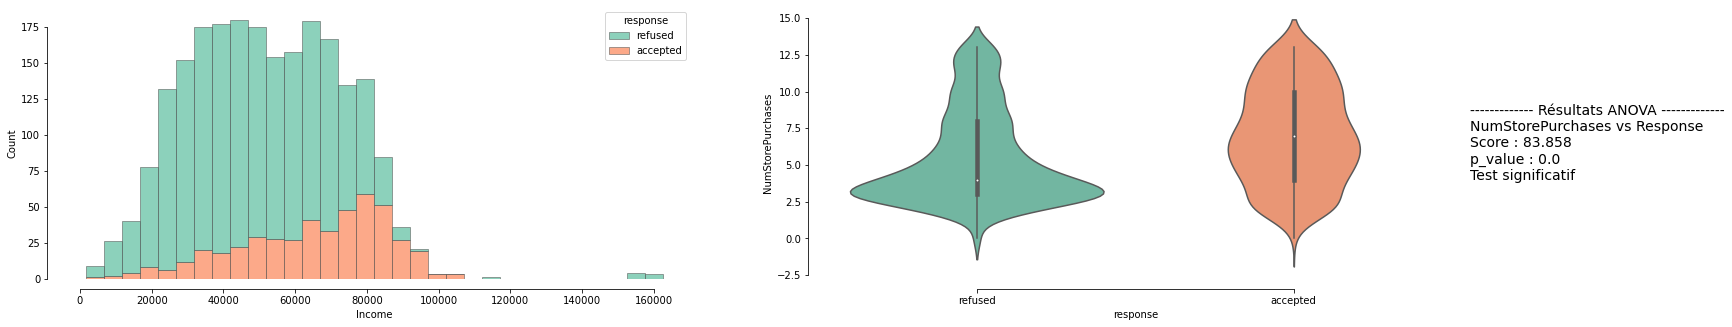

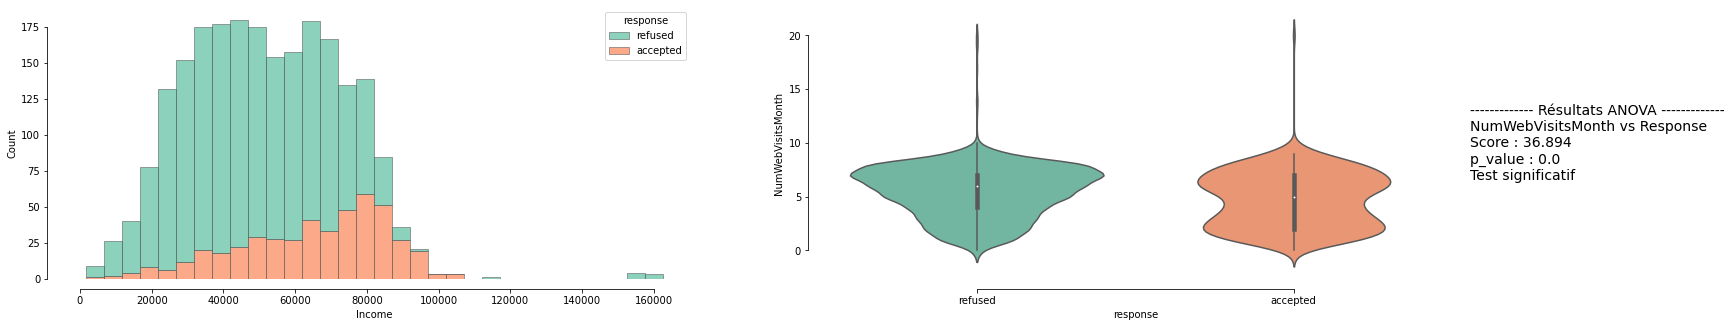

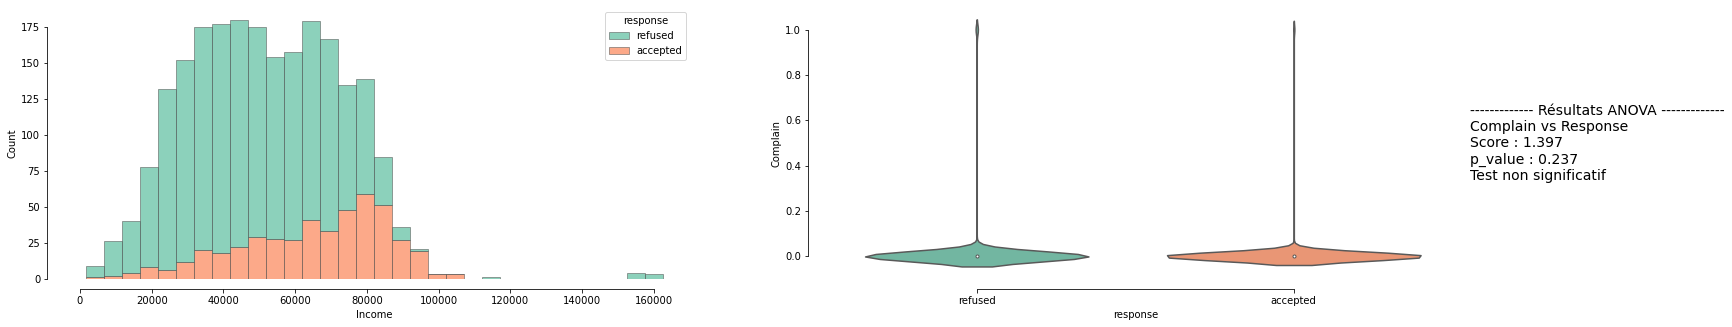

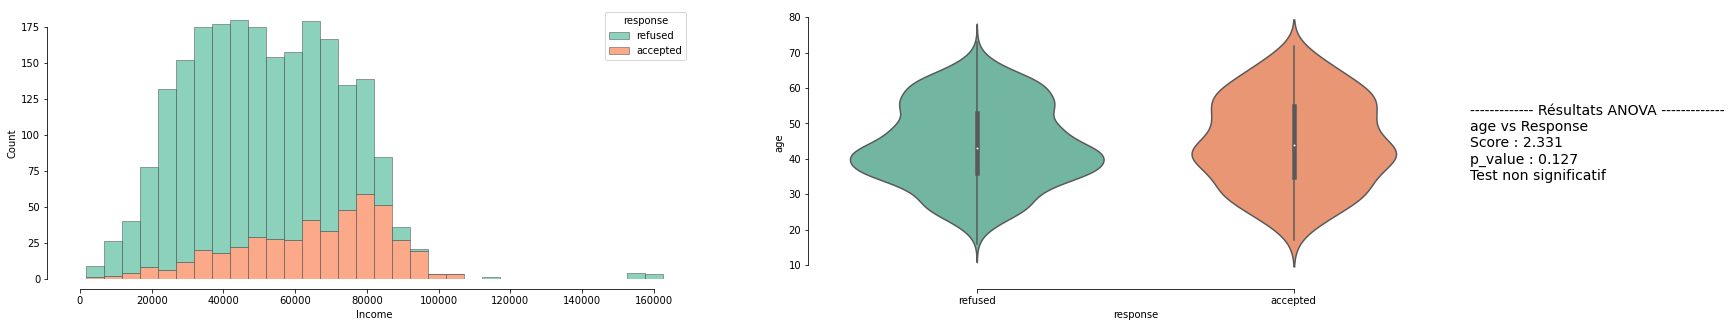

In [37]:
for element in num_col:
    graph(element)
    

Conclusion:
- Pour les variables 'Recency', 'Complain' & 'Âge' --> pas de différences significatives entre les deux groupes (1 réponse et pas de réponse)
- Pour les autres variables, il existe une différence significative
- Nous pouvons éliminer de notre modèle les variables avec un test non significatif.


#### Données qualitative vs qualitatives

In [38]:
def chi(cat_col1, cat_col2 = 'response'):
    crosstab = pd.crosstab(df[cat_col1], df[cat_col2])
    result = stats.chi2_contingency(crosstab)
    return round(result[0],3), round(result[1],3)

In [39]:
def cat_graph(cat_col):
    
    sns.countplot(data = df, x=cat_col, hue='response',palette="Set2",
    edgecolor=".3",linewidth=.5)

    sns.despine(offset=10, trim=True);

    # A l'aide de notre fonction définit plus haut, nous allons afficher des informations sur nos données
    T, p  = chi(cat_col)
    text = f'------------- Résultats Chi² -------------\n'
    text += f'{cat_col} vs Response\n'
    text += f"Score : {round(T,3)}\np_value : {round(p,3)}\n"
    if p<0.05:
        text += 'Test significatif'
    else:
        text += 'Test non significatif'

    plt.text(0.91,0.4,text, fontsize=13, transform=plt.gcf().transFigure)

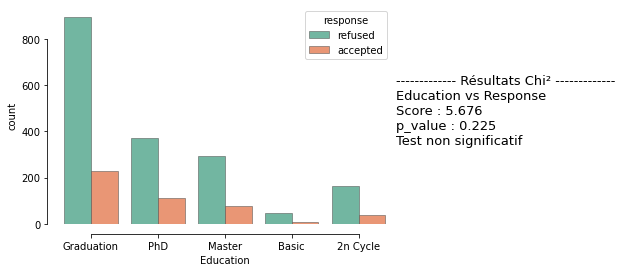

In [40]:
cat_graph('Education')

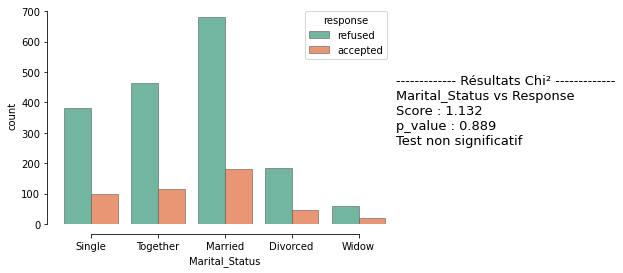

In [41]:
cat_graph('Marital_Status')

#### Données quantitatives vs quantitatives
Vérification de non présence de colinéarité entre nos variables quantitatives 

In [42]:
def corr(col1, feature):
    output = pd.DataFrame(columns= ['Score', 'p_value'])
    corr, p = stats.pearsonr(df[col1], df[feature])
    a = print(f"{col1} vs Response")
    b = print(f"Score : {round(corr,3)} | p_value : {round(p,3)}")
    return a, b 

def num_vs_num(df, col1, col2):
    sns.jointplot(data = df, x= col1, y=col2, kind='reg')

    a,b = corr(df, col1, col2)
    
    text = f"{a}\n"
    text += b
    plt.text(1,0.25,text, fontsize=13, transform=plt.gcf().transFigure)

<AxesSubplot:>

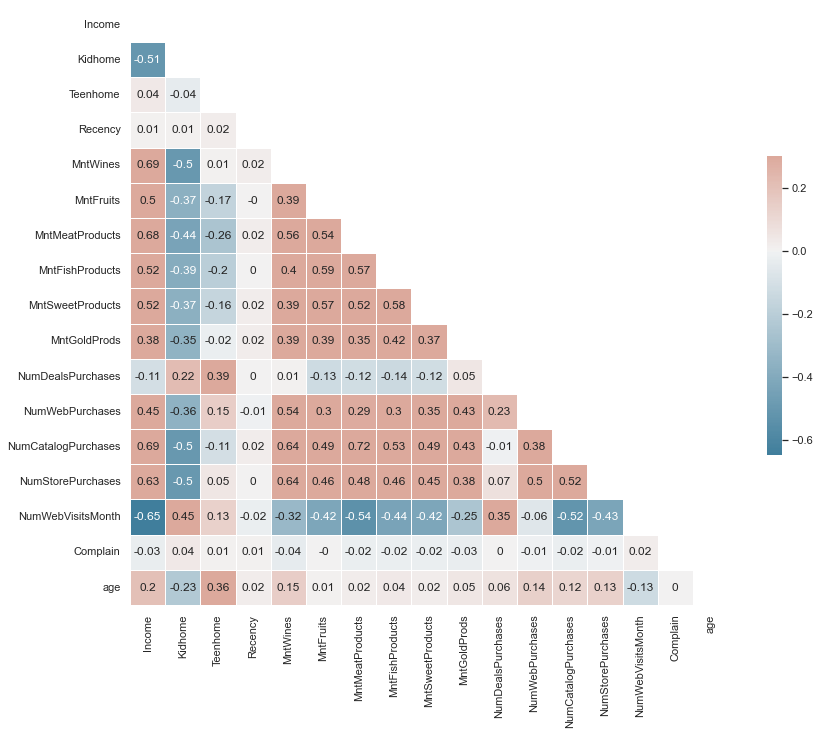

In [43]:
sns.set_theme(style="white")

# Création d'une matrice de correlation via la fonction panda : 'corr'
corr = df.corr().apply(lambda x: round(x,2)) # Utilisation de la fonction apply pour automatiquement arrondir le résultat à 2 unités après la virgule

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Plusieures variables sont fortement corrélées les unes par rapport aux autres.
* Les variables liées au Revenu et à la dépense en fruits, légumes... (plutôt logique)
* Revenu & dépense dans le magasin (site internet, dépenses au niveau du catalogue)


## Section 3 - Création de notre modèle 


In [71]:
# Transformons notre variable expliquée en variable binaire.
df['Response_num'] = df['response'].apply(lambda x : 1 if x=='accepted' else 0)

In [72]:
dataset = df.copy()

In [73]:
dataset.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,response,age,Response_num
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,refused,55,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,refused,60,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,refused,48,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,refused,30,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,refused,33,0


In [74]:
# Nous retirons les variables qui ont des tests statisques non significatifs
dataset.drop(columns=['response', 'Education','Marital_Status', 'Recency', 'Complain','age'], inplace=True)

In [75]:
dataset.head()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response_num
0,58138.0,0,0,635,88,546,172,88,88,3,8,10,4,7,0
1,46344.0,1,1,11,1,6,2,1,6,2,1,1,2,5,0
2,71613.0,0,0,426,49,127,111,21,42,1,8,2,10,4,0
3,26646.0,1,0,11,4,20,10,3,5,2,2,0,4,6,0
4,58293.0,1,0,173,43,118,46,27,15,5,5,3,6,5,0


In [82]:
def models(df):
    
    #Import des librairies
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn import svm
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import GridSearchCV
    from sklearn import metrics
    from sklearn.preprocessing import MinMaxScaler

    # Séparation de nos variables explicatives et expliquées
    X = df.drop(columns='Response_num')
    y = df['Response_num']

    # Normalisation de nos variables
    obje_ss=MinMaxScaler()

    # Sépration de nos données en 2 : un groupe pour l'entraînement et un autre pour l'évaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state =42 )

    X_train=obje_ss.fit_transform(X_train)
    X_test=obje_ss.fit_transform(X_test)

    # Modèle 1 : Régression Logistique
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, y_train)

    logistic_model.score(X_test,y_test)
    y_pred=logistic_model.predict(X_test)

    print('Logistic Regression score:',round(logistic_model.score(X_test,y_test),4)*100)

    print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),4)*100)
    print("Precision:",round(metrics.precision_score(y_test, y_pred),4)*100)
    print("Recall:",round(metrics.recall_score(y_test, y_pred),4)*100)
    print('---------------------------')

    # Modèle 2 : Support Vector Machine
    model_svc=svm.SVC()
    model_svc.fit(X_train,y_train)
    print('Support Vecktor Classification score:',round(model_svc.score(X_test,y_test),4)*100)

    y_pred=model_svc.predict(X_test)


    print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),4)*100)
    print("Precision:",round(metrics.precision_score(y_test, y_pred),4)*100)
    print("Recall:",round(metrics.recall_score(y_test, y_pred),3)*100)
    print('---------------------------')


    # Modèle 3 : RandomForest
    model_rfc=RandomForestClassifier()
    model_rfc.fit(X_train,y_train)
    print('Random Forest Classifier score:',round(model_rfc.score(X_test,y_test),4)*100)

    y_pred=model_rfc.predict(X_test)


    print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),4)*100)
    print("Precision:",round(metrics.precision_score(y_test, y_pred),4)*100)
    print("Recall:",round(metrics.recall_score(y_test, y_pred),4)*100)
    print('---------------------------')


In [84]:
models(dataset)


Logistic Regression score: 83.04
Accuracy: 83.04
Precision: 80.46
Recall: 39.33
---------------------------
Support Vecktor Classification score: 82.36
Accuracy: 82.36
Precision: 87.5
Recall: 31.5
---------------------------
Random Forest Classifier score: 85.89
Accuracy: 85.89
Precision: 84.26
Recall: 51.12
---------------------------
